## 图像识别-生活垃圾分类
### 浅层CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import itertools

import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Input
from keras.models import Sequential, Model

from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

plt.style.use('ggplot')
plt.switch_backend('agg')

Using TensorFlow backend.


### 1 图像数据预处理
加载完成处理的数据集

In [2]:
#加载处理好的数据与标签
Xtrain = np.load('encoded/X_train_C_192.npy')
Xvalid = np.load('encoded/X_valid_C_192.npy')
Ytrain = np.load('encoded/Y_train_C_192.npy')
Yvalid = np.load('encoded/Y_valid_C_192.npy')
print(Xtrain.shape)
print(Xvalid.shape)

(22002, 192, 192, 3)
(9430, 192, 192, 3)


### 2 模型搭建

In [3]:
# 搭建cnn模型
batch_size = 100
num_classes = 16
epochs = 120

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu',input_shape=Xtrain.shape[1:],padding= 'same')) ##input_shape=Xtrain.shape[1:]-->读取128*128尺寸图像
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3))) #减少模型参数数量, 滑动一个 3*3的滤波器, 从这个滤波器的 4 个值中取最大值.
model.add(Dropout(0.3))   # Dropout 训练和预测时随机减少特征个数，即去掉输入数据中的某些维度，用于防止过拟合

model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())  #卷积层的权重在传递给全连接Dense层之前, 必须压平 (维度为 1).
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))   #全连接层，用softmax激活函数

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #损失函数、优化函数、评价指标

W0213 15:24:56.181094   484 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0213 15:24:56.288099   484 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0213 15:24:56.317102   484 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0213 15:24:56.393108   484 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0213 15:24:56.398111   484 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:133:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 192, 192, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 190, 190, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
__________

W0213 15:24:56.809138   484 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0213 15:24:56.847143   484 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                73744     
Total params: 360,752
Trainable params: 360,752
Non-trainable params: 0
____

### 3 模型训练

In [5]:
# 训练模型
callbacks = [keras.callbacks.TensorBoard(log_dir='my_log_dir', histogram_freq=1)]

trained_model = model.fit(Xtrain, Ytrain, 
                          epochs =epochs, 
                          shuffle = True, 
                          batch_size = batch_size,
                          validation_data=(Xvalid, Yvalid), 
                          callbacks=callbacks)
                                        ##迭代次数        

W0904 17:16:49.157478  9932 deprecation.py:323] From D:\Anaconda\envs\tensorflow\Lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 22001 samples, validate on 9430 samples


W0904 17:16:50.196265  9932 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\callbacks.py:796: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0904 17:16:50.235053  9932 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0904 17:16:50.239054  9932 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/120
22001/22001 [==============================] - 1687s 77ms/step - loss: 2.5264 - acc: 0.1656 - val_loss: 2.3358 - val_acc: 0.2498
Epoch 2/120
22001/22001 [==============================] - 1686s 77ms/step - loss: 2.2312 - acc: 0.2690 - val_loss: 2.1264 - val_acc: 0.3093
Epoch 3/120
22001/22001 [==============================] - 1744s 79ms/step - loss: 2.0595 - acc: 0.3316 - val_loss: 2.1684 - val_acc: 0.2880
Epoch 4/120
22001/22001 [==============================] - 1724s 78ms/step - loss: 1.9816 - acc: 0.3582 - val_loss: 1.8412 - val_acc: 0.4030
Epoch 5/120
22001/22001 [==============================] - 1762s 80ms/step - loss: 1.8311 - acc: 0.4018 - val_loss: 1.7914 - val_acc: 0.4169
Epoch 6/120
22001/22001 [==============================] - 1866s 85ms/step - loss: 1.7459 - acc: 0.4281 - val_loss: 1.7914 - val_acc: 0.4188
Epoch 7/120
22001/22001 [==============================] - 2063s 94ms/step - loss: 1.6767 - acc: 0.4494 - val_loss: 1.6097 - val_acc: 0.4755
Epoch 8/120
2

In [6]:
# 训练过程可视化
def overfitting_plot(history, name):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')
    plt.savefig('acc_'+name+'.png')
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best')
    plt.savefig('loss_'+name+'.png')

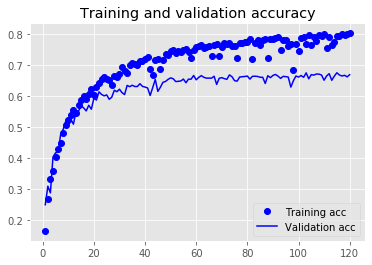

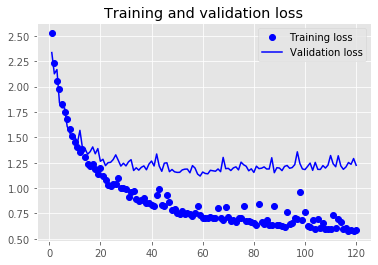

In [7]:
overfitting_plot(trained_model, '')

In [17]:
# 保存模型
model.save('modelC_192.h5')

### 4 模型评估

In [8]:
# 测试模型
score = model.evaluate(Xvalid, Yvalid, verbose=1)  #evalute()展示模型在验证数据上的效果
print('Test score:', score[0])
print('Test accuracy:', score[1])

9430/9430 [==============================] - 142s 15ms/step
Test score: 1.2246970427251191
Test accuracy: 0.668186638438689


In [10]:
num_classes = 16
y_pred = model.predict(Xvalid)
# Convert one-hot to index
y_pred = np.argmax(y_pred, axis=1)
y_pred = to_categorical(y_pred, num_classes)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(Yvalid, y_pred))
##主要看f1值指标

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       527
           1       0.68      0.79      0.73       663
           2       0.74      0.71      0.72       498
           3       0.56      0.49      0.52       600
           4       0.75      0.71      0.73       528
           5       0.69      0.60      0.64       719
           6       0.61      0.59      0.60       652
           7       0.75      0.61      0.68       576
           8       0.76      0.79      0.77       630
           9       0.58      0.58      0.58       586
          10       0.55      0.78      0.64       663
          11       0.70      0.75      0.72       623
          12       0.82      0.71      0.76       487
          13       0.71      0.77      0.74       586
          14       0.62      0.63      0.63       594
          15       0.73      0.65      0.69       498

   micro avg       0.67      0.67      0.67      9430
   macro avg       0.68   

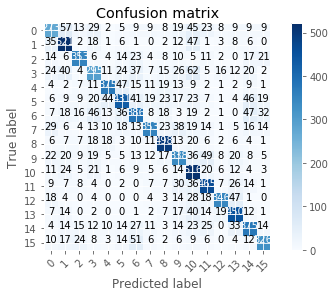

In [16]:
# 多分类混淆矩阵图
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(Xvalid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Yvalid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(16)) ###########################

#### 单张图片预测

In [12]:
# 模型测试
import cv2 as cv
import numpy as np
from keras.models import load_model

model = load_model('model0903.h5')
image_path = './training/_0paper/paper (109).jpg'
# image_path = 'C:\\Users\\lenovo\\Desktop\\test\\qwe.jpg'
img = cv.cvtColor(cv.imread(image_path),cv.COLOR_BGR2RGB)
img = cv.resize(img, (128,128))

 #需要用reshape定义出例子的个数，图片的 通道数，图片的长与宽。具体的参加keras文档
image = (img.reshape(1,128, 128, 3)).astype('int32')/255 
predict = model.predict_classes(image)
print ('识别为：')
print (predict)

cv.imshow("Image1", img)
cv.waitKey(0)

# 时间复杂度较高 待优化
# 颜色通道 黄绿？？？
# 准确率低

识别为：
[4]


-1